In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshayakondaveeti10","key":"5a99b2b921b56dd8a7dffc42cfa954b0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 1.07GB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumo

In [4]:
!pip install tensorflow


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

train = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Load pretrained model
base = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base.trainable = False

# Add classification head
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
preds = Dense(2, activation="softmax")(x)

model = Model(inputs=base.input, outputs=preds)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train,
    validation_data=val,
    epochs=10
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5213 - loss: 1.0854 - val_accuracy: 0.6200 - val_loss: 0.7450
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6537 - loss: 0.6609 - val_accuracy: 0.7200 - val_loss: 0.3924
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7254 - loss: 0.5161 - val_accuracy: 0.9000 - val_loss: 0.2469
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8369 - loss: 0.3864 - val_accuracy: 0.9600 - val_loss: 0.1852
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9026 - loss: 0.2615 - val_accuracy: 0.8800 - val_loss: 0.2000
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9186 - loss: 0.2094 - val_accuracy: 0.9600 - val_loss: 0.1864
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9180 - loss: 0.1940 - val_accuracy: 0.9800 - val_loss: 0.1399
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9317 - loss: 0.1497 - val_accuracy: 0.9200 - val_loss: 0.1704
Epoch 9/

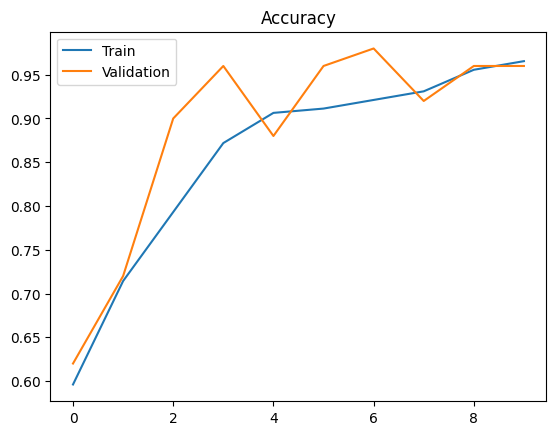

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title('Accuracy')
plt.show()


In [7]:
model.save("mri_model.h5")


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val.reset()
preds = model.predict(val)
pred_labels = np.argmax(preds, axis=1)

true_labels = val.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step
[[ 9 10]
 [11 20]]
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.67      0.65      0.66        31

    accuracy                           0.58        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.58      0.58      0.58        50



In [9]:
base.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(train, validation_data=val, epochs=5)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.7031 - loss: 0.8181 - val_accuracy: 0.9400 - val_loss: 0.1919
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 9s/step - accuracy: 0.7131 - loss: 0.7061 - val_accuracy: 0.9000 - val_loss: 0.1987
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step - accuracy: 0.7394 - loss: 0.6672 - val_accuracy: 0.9600 - val_loss: 0.2574
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.7711 - loss: 0.5536 - val_accuracy: 0.9400 - val_loss: 0.2207
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.7969 - loss: 0.4112 - val_accuracy: 0.8800 - val_loss: 0.2622


In [11]:
base.trainable = True

# Freeze first layers, train deeper ones
for layer in base.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train,
    validation_data=val,
    epochs=5
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9012 - loss: 0.2294 - val_accuracy: 0.8800 - val_loss: 0.3604
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9280 - loss: 0.2314 - val_accuracy: 0.9000 - val_loss: 0.2642
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8926 - loss: 0.2207 - val_accuracy: 0.8800 - val_loss: 0.3223
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8795 - loss: 0.2648 - val_accuracy: 0.9200 - val_loss: 0.3325
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9110 - loss: 0.2288 - val_accuracy: 0.8800 - val_loss: 0.2811


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val.reset()
preds = model.predict(val)
pred_labels = np.argmax(preds, axis=1)

true_labels = val.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
[[ 7 12]
 [15 16]]
              precision    recall  f1-score   support

           0       0.32      0.37      0.34        19
           1       0.57      0.52      0.54        31

    accuracy                           0.46        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.48      0.46      0.47        50



/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


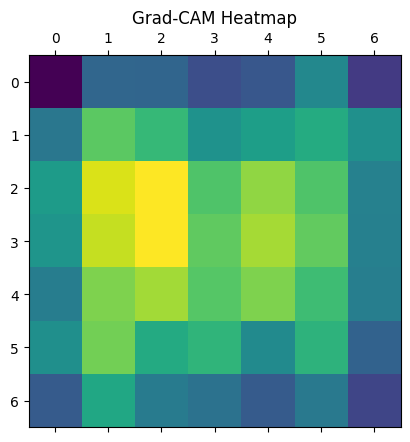

In [15]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Prepare the image
img_path = val.filepaths[0]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Create a model that outputs both the last conv layer and the predictions
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer("Conv_1").output, model.output]
)

# Record gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, np.argmax(predictions[0])]

# Compute gradients of the loss w.r.t. the conv layer output
grads = tape.gradient(loss, conv_outputs)

# Pool the gradients across channels (Importance weights)
weights = tf.reduce_mean(grads, axis=(0, 1, 2))

# Compute the weighted sum of feature maps to get the 2D heatmap
heatmap = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)

# Apply ReLU to the heatmap and normalize it for visualization
heatmap = np.maximum(heatmap, 0)
if np.max(heatmap) != 0:
    heatmap /= np.max(heatmap)

# Plot the 2D heatmap
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.show()

In [16]:
model.save("mri_model.h5")


In [18]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras mri_model.h5 tfjs_model


2026-02-05 04:18:58.052745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770265138.095211    6244 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770265138.106601    6244 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770265138.139831    6244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770265138.139890    6244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770265138.139900    6244 computation_placer.cc:177] computation placer alr

In [19]:
model.save("mri_model.h5")


In [22]:
model.save("/content/mri_model_final.h5")


In [23]:
from google.colab import files
files.download("/content/mri_model_final.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


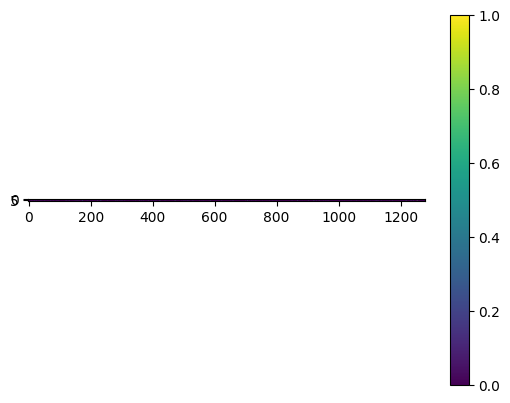

In [24]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Pick a validation image
img_path = val.filepaths[0]

# Load image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img = img / 255.0

img_array = np.expand_dims(img, axis=0)

# Create grad model
last_conv_layer = model.get_layer("Conv_1")

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# Compute gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    class_idx = np.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)

# Build heatmap
heatmap = tf.reduce_mean(grads, axis=(0,1))
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap)

# Show heatmap
plt.imshow(heatmap)
plt.colorbar()
plt.show()


Using layer: Conv_1


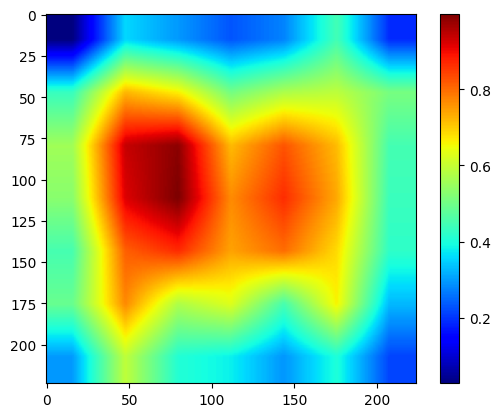

In [41]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Select image
img_path = val.filepaths[0]

img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img = img/255.0
img_array = np.expand_dims(img, axis=0)

# Find last conv layer automatically
last_conv_layer = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

print("Using layer:", last_conv_layer)

grad_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=[model.get_layer(last_conv_layer).output, model.output]
)

# Gradient tape
with tf.GradientTape() as tape:
    # Pass input as a list to avoid the structure mismatch warning
    conv_outputs, predictions = grad_model([img_array])
    class_idx = np.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)

# Build heatmap
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
conv_outputs = conv_outputs[0]

heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Apply ReLU and normalize
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize heatmap
heatmap = cv2.resize(heatmap, (224,224))

plt.imshow(heatmap, cmap="jet")
plt.colorbar()
plt.show()

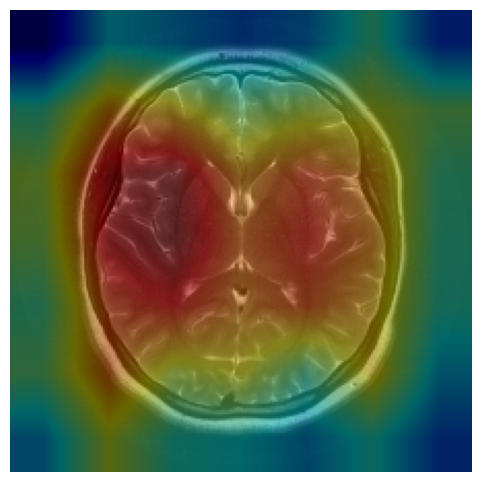

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [29]:
img_path = val.filepaths[5]


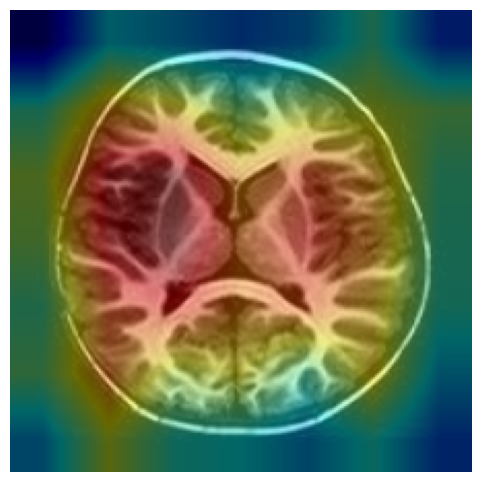

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [31]:
img_path = val.filepaths[10]

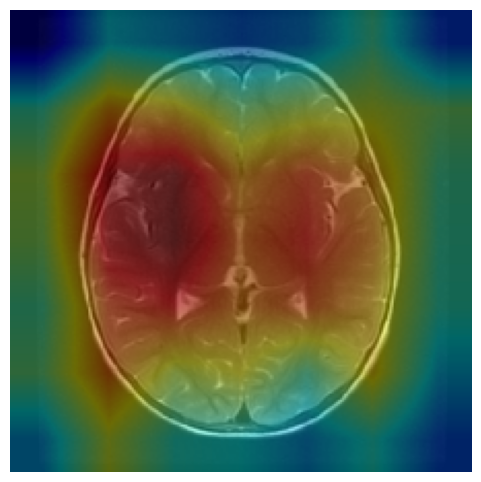

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [33]:
img_path = val.filepaths[15]

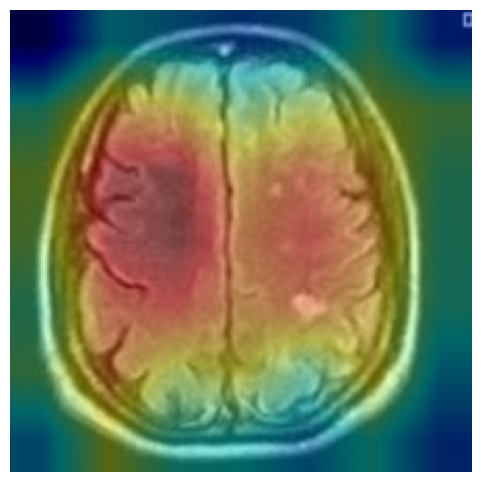

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [35]:
img_path = val.filepaths[20]

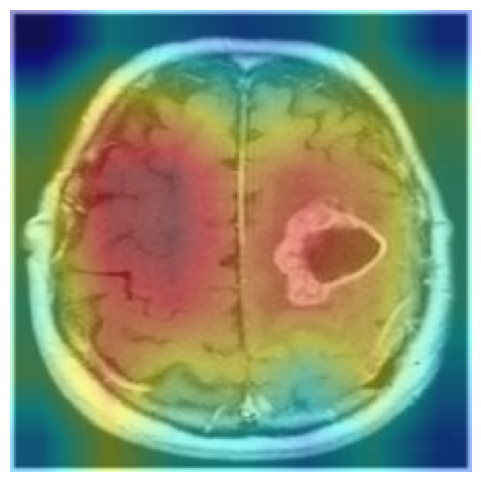

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [37]:
img_path = val.filepaths[25]

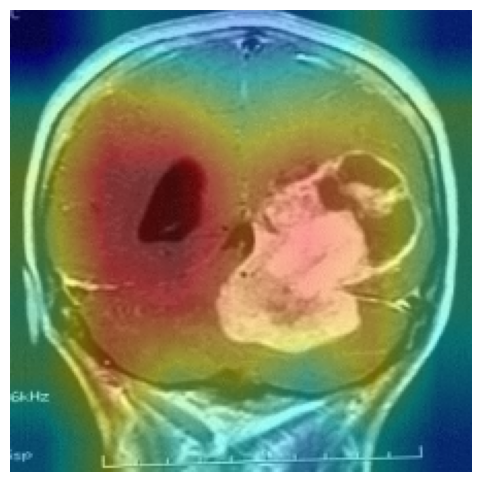

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

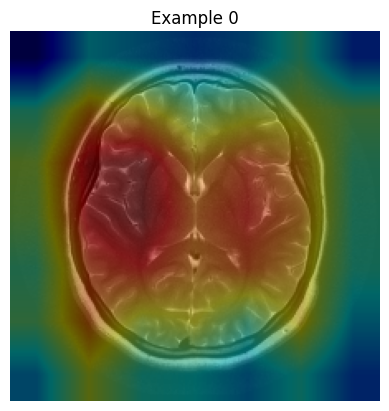

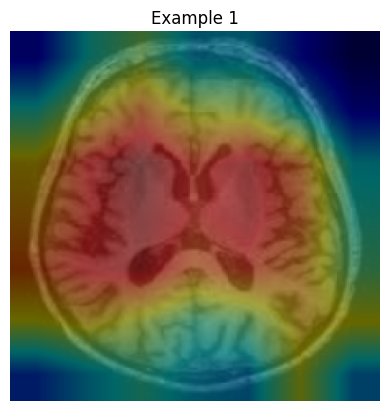

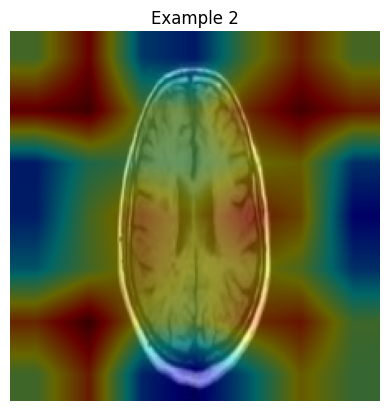

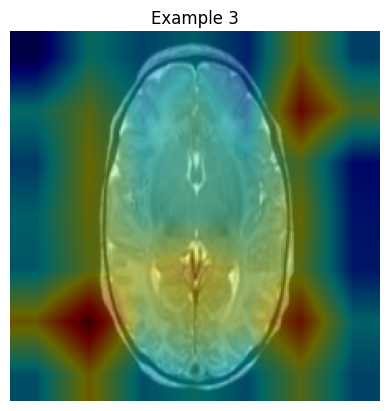

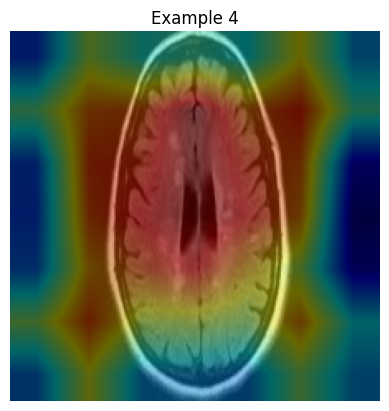

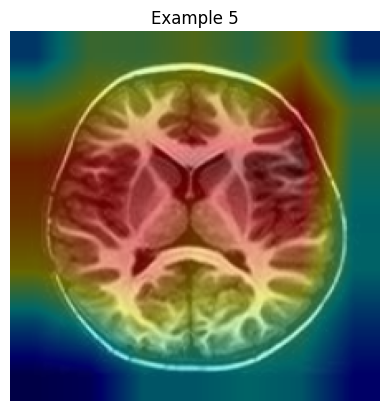

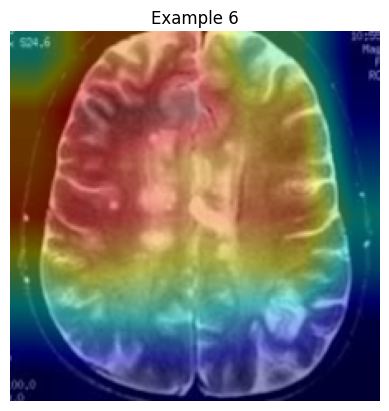

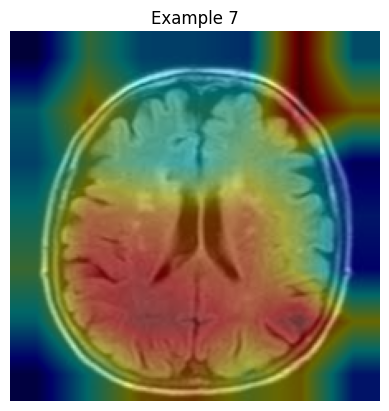

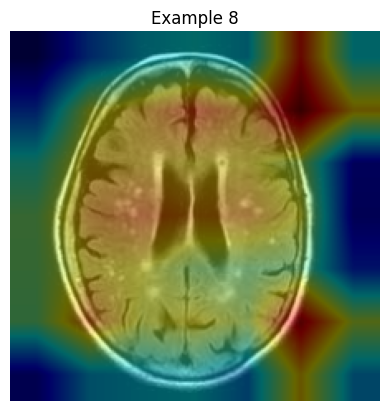

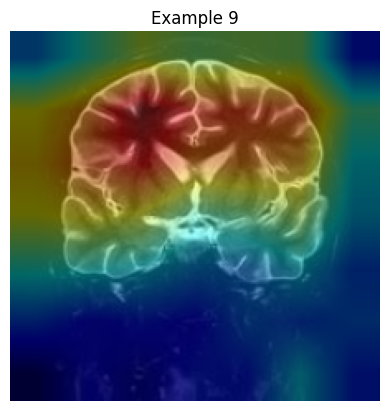

In [42]:
for i in range(10):
    img_path = val.filepaths[i]

    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    img_norm = img/255.0
    img_array = np.expand_dims(img_norm, axis=0)

    with tf.GradientTape() as tape:
        # Pass input as a list to avoid the structure mismatch warning
        conv_outputs, predictions = grad_model([img_array])
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU and normalize (results in a numpy array)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    # Resize heatmap (no need for .numpy())
    heatmap = cv2.resize(heatmap, (224,224))

    heatmap_color = cv2.applyColorMap(
        np.uint8(255*heatmap),
        cv2.COLORMAP_JET
    )

    overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(f"Example {i}")
    plt.axis("off")
    plt.show()

In [43]:
cv2.imwrite(f"gradcam_{i}.png", overlay)


True

In [45]:
from google.colab import files
# Changed to gradcam_9.png as it is the file that was actually saved
files.download("gradcam_9.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
for i in range(10):
    ...
    cv2.imwrite(f"/content/gradcam_{i}.png", overlay)


In [47]:
!zip -r gradcams.zip /content/gradcam_*.png
from google.colab import files
files.download("gradcams.zip")


  adding: content/gradcam_0.png (deflated 6%)
  adding: content/gradcam_1.png (deflated 6%)
  adding: content/gradcam_2.png (deflated 6%)
  adding: content/gradcam_3.png (deflated 6%)
  adding: content/gradcam_4.png (deflated 6%)
  adding: content/gradcam_5.png (deflated 6%)
  adding: content/gradcam_6.png (deflated 6%)
  adding: content/gradcam_7.png (deflated 6%)
  adding: content/gradcam_8.png (deflated 6%)
  adding: content/gradcam_9.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>